In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

Mounted at /content/drive


In [ ]:
'''
tweet_df = pd.read_csv('/content/drive/My Drive/cs109b-finalproject/tweets_annotation.csv')
tweet_df['TweetAvgAnnotation'] = tweet_df['AverageAnnotation']
tweet_df.drop('AverageAnnotation', axis=1)

user_df = pd.read_csv('/content/drive/My Drive/cs109b-finalproject/user_information.csv')
user_df['UserAvgAnnotation'] = user_df['AverageAnnotation']
user_df.drop('AverageAnnotation', axis=1)

df = pd.merge(tweet_df, user_df, on='Username')
df = df.drop('AverageAnnotation_y', axis=1)
df = df.drop('AverageAnnotation_x', axis=1)

def extract_info(profile_info_str):
    if not isinstance(profile_info_str, str):
        return pd.Series({
          'UserDescription': None,
          'Followers': None,
          'Following': None,
          'TotalTweetCount': None,
          'FavoritesCount': None
        })

    info_dict = {}

    patterns = {
        'UserDescription': r'description: (.*?),',
        'Followers': r'followers: (\d+)',
        'Following': r'following: (\d+)',
        'TotalTweetCount': r'total tweet number: (\d+)',
        'FavoritesCount': r'favorites_count: (\d+)'
    }

    for key, pattern in patterns.items():
        match = re.search(pattern, profile_info_str)
        if match:
            info_dict[key] = match.group(1).strip()
        else:
            info_dict[key] = None

    return pd.Series(info_dict)

new_columns = df['ProfileInfo'].apply(extract_info)
df = pd.concat([df, new_columns], axis=1)
df = df.drop('ProfileInfo', axis=1)

def label_value(x):
    if x < -1:
        return 'Negative'
    elif x > 1:
        return 'Positive'
    else:
        return 'Neutral'

df['Sentiment'] = df['TweetAvgAnnotation'].apply(label_value)

df_filepath = '/content/drive/My Drive/cs109b-finalproject/dataframe.csv'
df.to_csv(df_filepath)

df = pd.read_csv(df_filepath)
df.head()
'''

In [ ]:
url = 'https://raw.githubusercontent.com/lindenschrage/cs109b-finalproject/main/dataframe.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Tweet,Username,TweetAvgAnnotation,UserAvgAnnotation,UserDescription,Followers,Following,TotalTweetCount,FavoritesCount,Sentiment
0,0,did i just hear clive anderson say peter cooke...,The_Bounder,1.00,0.412698,a bell was ringing in the village square,675.0,431.0,12040.0,1834.0,Neutral
1,1,@cheekylisa32 i suppose you just laugh it off....,The_Bounder,-0.25,0.412698,a bell was ringing in the village square,675.0,431.0,12040.0,1834.0,Neutral
2,2,what's happened to it? if it's been nuked or s...,The_Bounder,-0.40,0.412698,a bell was ringing in the village square,675.0,431.0,12040.0,1834.0,Neutral
3,3,@trollulike @fox_claire @bbcradio4 haha!,The_Bounder,0.50,0.412698,a bell was ringing in the village square,675.0,431.0,12040.0,1834.0,Neutral
4,4,go and put your feet up #nickclegg. you did a ...,The_Bounder,0.75,0.412698,a bell was ringing in the village square,675.0,431.0,12040.0,1834.0,Neutral


<ipython-input-15-f6349ea7ea13>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Tweet Length', palette='Set2')


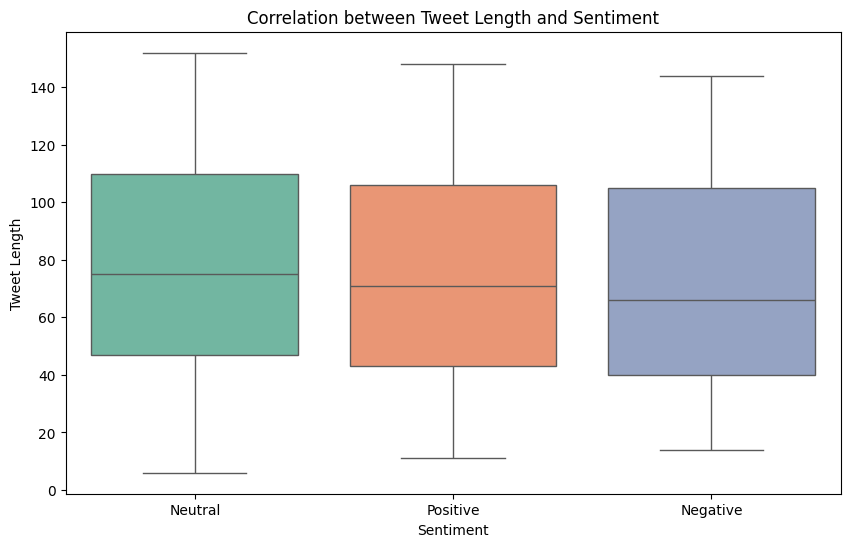

In [ ]:
## Correlation between tweet length and sentiment
df['Tweet Length'] = df['Tweet'].apply(len)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Tweet Length', palette='Set2')
plt.title('Correlation between Tweet Length and Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

<ipython-input-24-68f636f720ad>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='TotalTweetCount', y='UserAvgAnnotation', palette='Set1', s=100)


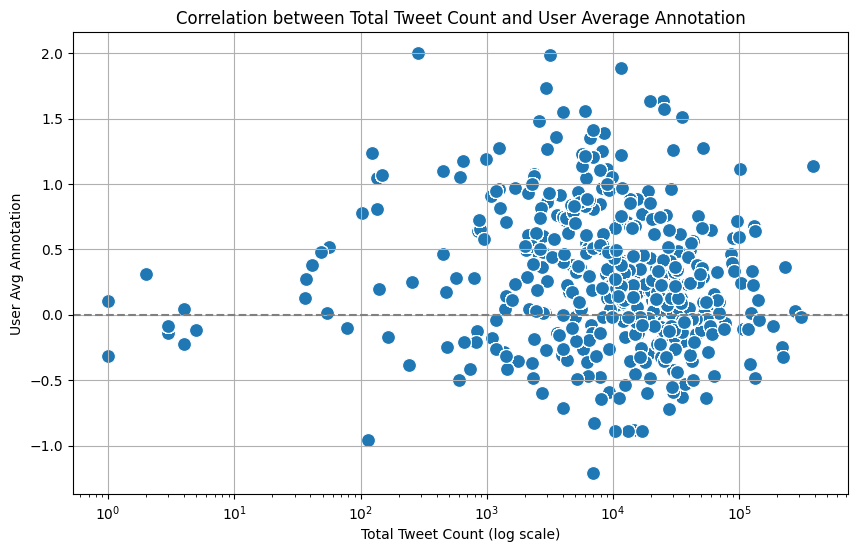

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalTweetCount', y='UserAvgAnnotation', palette='Set1', s=100)
plt.title('Correlation between Total Tweet Count and User Average Annotation')
plt.xlabel('Total Tweet Count (log scale)')
plt.ylabel('User Avg Annotation')
plt.xscale('log')
plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

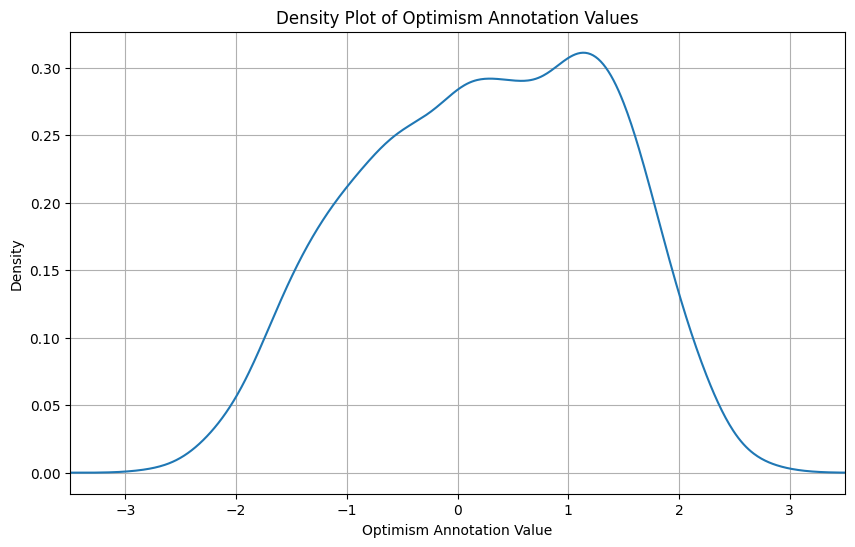

In [ ]:
plt.figure(figsize=(10,6))
df['TweetAvgAnnotation'].plot(kind='density', bw_method=0.2, xlim=(-3.5, 3.5))
plt.xlabel('Optimism Annotation Value')
plt.ylabel('Density')
plt.title('Density Plot of Optimism Annotation Values')
plt.grid(True)
plt.show()

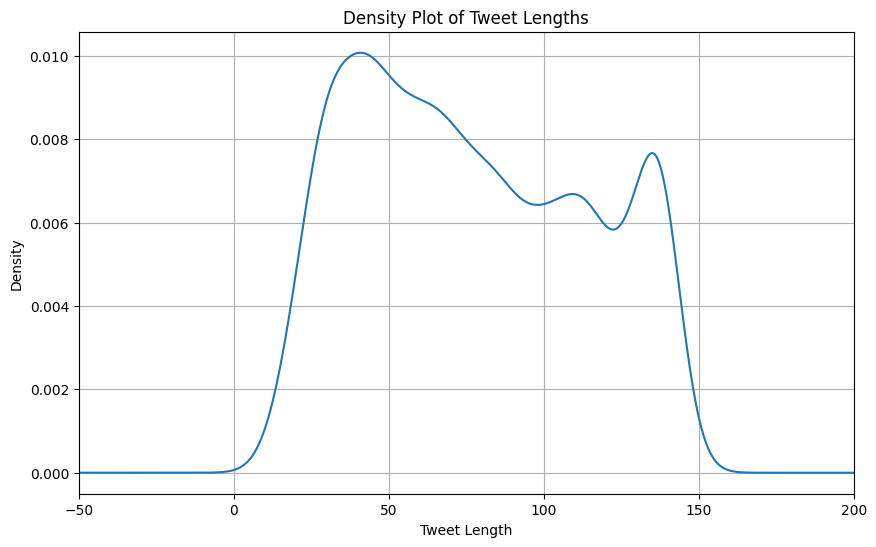

Mean Tweet Length: 77.00842809364549
Min Tweet Length: 6
Max Tweet Length: 152


In [ ]:
tweet_lengths = [len(tweet) for tweet in df['Tweet']]

tweet_lengths_df = pd.DataFrame(tweet_lengths, columns=['Length'])

plt.figure(figsize=(10,6))
tweet_lengths_df['Length'].plot(kind='density', xlim=(-50, 200))
plt.xlabel('Tweet Length')
plt.ylabel('Density')
plt.title('Density Plot of Tweet Lengths')
plt.grid(True)
plt.show()

mean_tweet_length = np.mean(tweet_lengths)
min_tweet_length = np.min(tweet_lengths)
max_tweet_length = np.max(tweet_lengths)

print(f'Mean Tweet Length: {mean_tweet_length}')
print(f'Min Tweet Length: {min_tweet_length}')
print(f'Max Tweet Length: {max_tweet_length}')

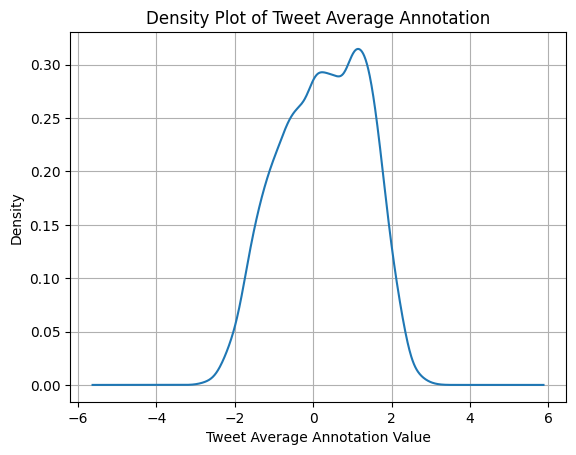

In [ ]:
df['TweetAvgAnnotation'].plot(kind='density')
plt.title('Density Plot of Tweet Average Annotation')
plt.xlabel('Tweet Average Annotation Value')
plt.ylabel('Density')
plt.grid(True)

plt.show()

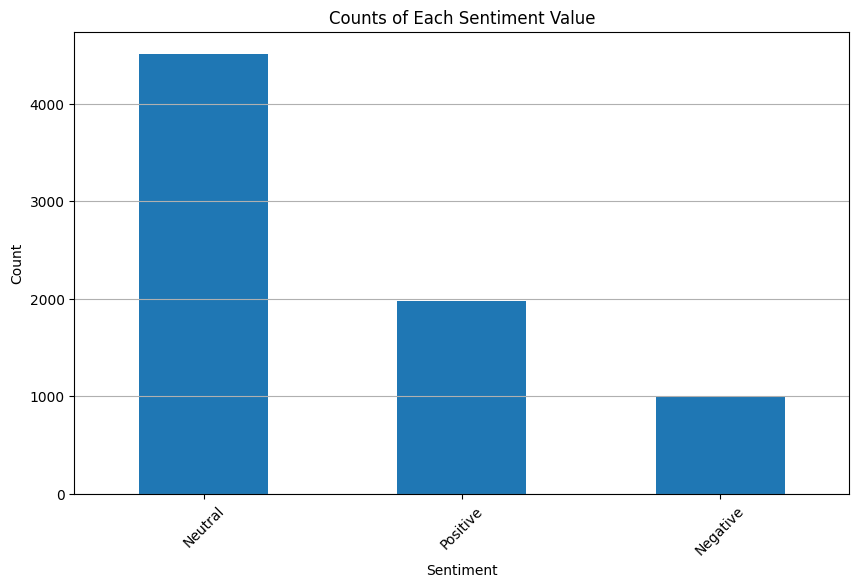

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(10,6))
sentiment_counts.plot(kind='bar')
plt.title('Counts of Each Sentiment Value')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

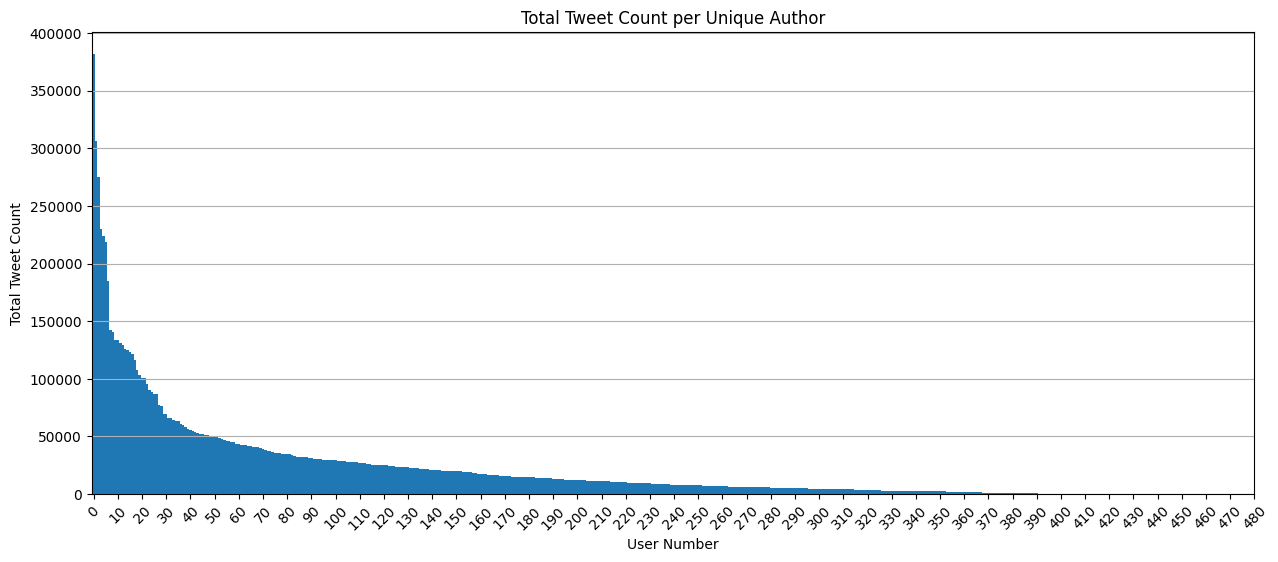

In [ ]:
unique_totals = df[['Username', 'TotalTweetCount']].drop_duplicates().set_index('Username')
unique_totals = unique_totals.dropna(subset=['TotalTweetCount'])
unique_totals['TotalTweetCount'] = unique_totals['TotalTweetCount'].astype(int)
unique_totals_sorted = unique_totals.sort_values(by='TotalTweetCount', ascending=False)
plt.figure(figsize=(15,6))
unique_totals_sorted['TotalTweetCount'].plot(kind='bar', width=1)
plt.title('Total Tweet Count per Unique Author')
plt.xlabel('User Number')
plt.ylabel('Total Tweet Count')
plt.xticks(rotation=45)
plt.xticks(ticks=range(0, 490, 10), labels=[str(i) for i in range(0, 490, 10) if i % 10 == 0 or i == 1], rotation=45)
plt.grid(axis='y')
plt.show()


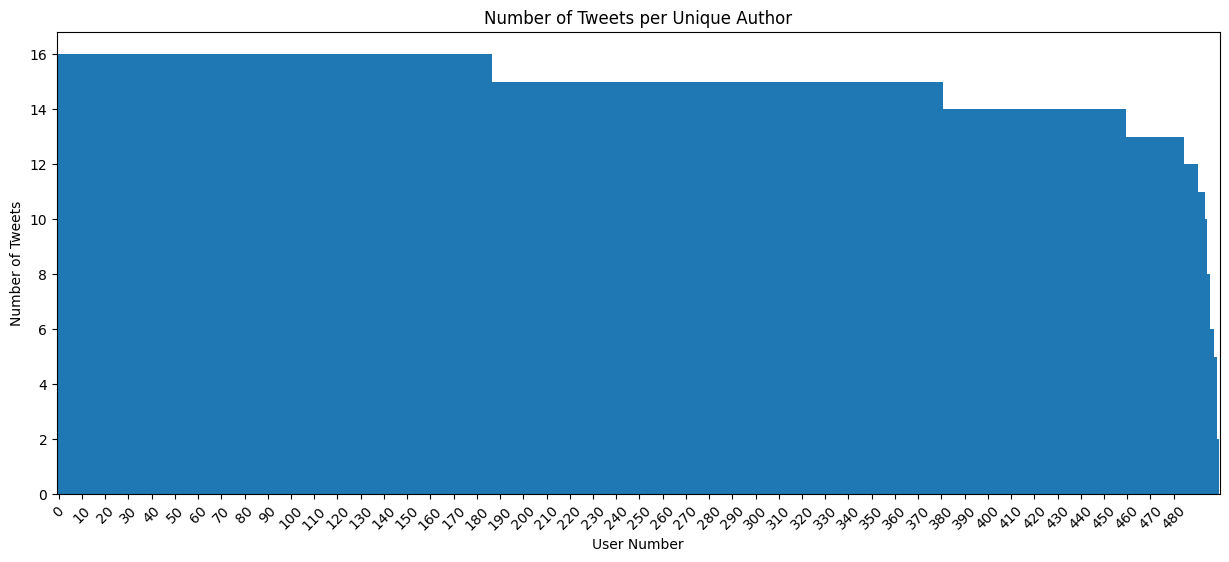

In [ ]:
tweet_counts = df['Username'].value_counts()

plt.figure(figsize=(15,6))
tweet_counts.plot(kind='bar', width=1)
plt.title('Number of Tweets per Unique Author')
plt.xlabel('User Number')
plt.ylabel('Number of Tweets')
plt.xticks(ticks=range(0, 490, 10), labels=[str(i) for i in range(0, 490, 10) if i % 10 == 0 or i == 1], rotation=45)
plt.grid(False)